# Apply feature engineering to interim data to obtain preprocessed data that's ready for the ML model

In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
import os
import sys

PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
sys.path.append(os.path.join(PROJ_ROOT, 'src'))

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Read interim data

In [58]:
from data.read import read_interim_data
df = read_interim_data('../data/interim/train.pkl')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329780 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1329780 non-null  object        
 1   vendor_id           1329780 non-null  int64         
 2   pickup_datetime     1329780 non-null  datetime64[ns]
 3   dropoff_datetime    1329780 non-null  datetime64[ns]
 4   passenger_count     1329780 non-null  int64         
 5   pickup_longitude    1329780 non-null  float64       
 6   pickup_latitude     1329780 non-null  float64       
 7   dropoff_longitude   1329780 non-null  float64       
 8   dropoff_latitude    1329780 non-null  float64       
 9   store_and_fwd_flag  1329780 non-null  object        
 10  trip_duration       1329780 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 121.7+ MB


# Target variable

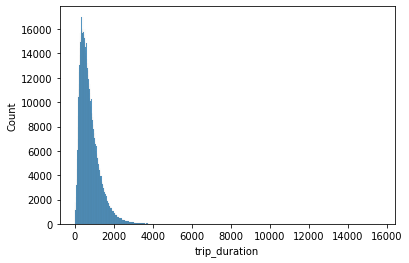

In [60]:
sns.histplot(data=df, x='trip_duration')
plt.show()

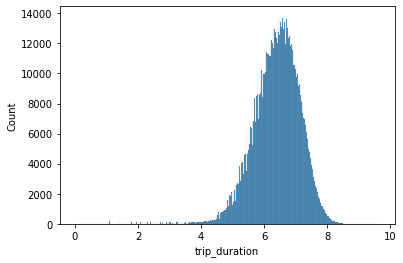

In [61]:
# power transformer to make normal distribution and stay away from zero and negative predictions
sns.histplot(data=df, x=np.log(df['trip_duration']))
plt.show()

# Categorical features

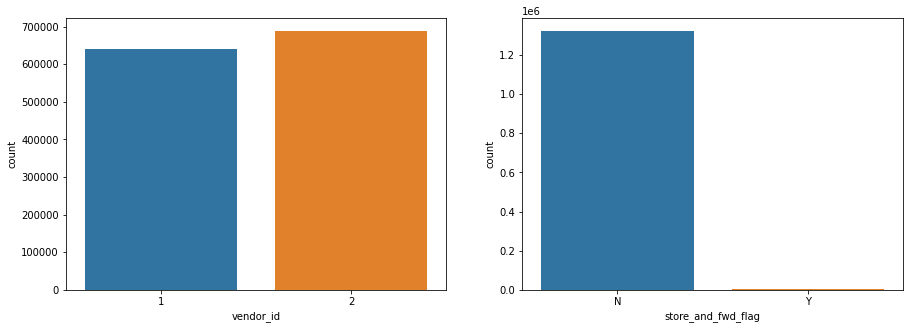

In [62]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.countplot(data=df, x='vendor_id')
plt.subplot(122)
sns.countplot(data=df, x='store_and_fwd_flag')

plt.show()

# both vendors have similar amount of trips
# store_and_fwd_flag feature do not have any value in helping to predict the outcomes

# Datetime features

In [63]:
# decompose datetime features
from features import decompose_pickup_datetime_features, decompose_dropoff_datetime_features
df = decompose_pickup_datetime_features(df)
df = decompose_dropoff_datetime_features(df)

# Numeric features

In [64]:
# create trip distance feature
from features import compute_trip_distance
df = compute_trip_distance(df)

In [65]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_datetime_date,pickup_datetime_day_of_week,pickup_datetime_hour,dropoff_datetime_date,dropoff_datetime_day_of_week,dropoff_datetime_hour,trip_distance
count,1.329780e+06,1.329780e+06,1.329780e+06,1.329780e+06,1.329780e+06,1.329780e+06,1.329780e+06,1.329780e+06,1.329780e+06,1.329780e+06,1.329780e+06,1.329780e+06,1.329780e+06,1.329780e+06
mean,1.517506e+00,1.513474e+00,-7.397821e+01,4.075335e+01,-7.397712e+01,4.075322e+01,7.618881e+02,1.549541e+01,3.048767e+00,1.364059e+01,1.549620e+01,3.053076e+00,1.363507e+01,2.755487e+00
std,4.996936e-01,1.057143e+00,2.440571e-02,2.262520e-02,2.277565e-02,2.682154e-02,5.346050e+02,8.700952e+00,1.950308e+00,6.377140e+00,8.700978e+00,1.952717e+00,6.453435e+00,2.338620e+00
min,1.000000e+00,1.000000e+00,-7.408286e+01,4.066645e+01,-7.408079e+01,4.065460e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399219e+01,4.073890e+01,-7.399153e+01,4.073768e+01,3.850000e+02,8.000000e+00,1.000000e+00,9.000000e+00,8.000000e+00,1.000000e+00,9.000000e+00,1.199519e+00
50%,2.000000e+00,1.000000e+00,-7.398212e+01,4.075490e+01,-7.398046e+01,4.075498e+01,6.330000e+02,1.500000e+01,3.000000e+00,1.400000e+01,1.500000e+01,3.000000e+00,1.400000e+01,1.989154e+00
75%,2.000000e+00,2.000000e+00,-7.396890e+01,4.076866e+01,-7.396548e+01,4.076984e+01,9.970000e+02,2.300000e+01,5.000000e+00,1.900000e+01,2.300000e+01,5.000000e+00,1.900000e+01,3.459303e+00
max,2.000000e+00,5.000000e+00,-7.385874e+01,4.083546e+01,-7.386534e+01,4.084905e+01,1.561700e+04,3.100000e+01,6.000000e+00,2.300000e+01,3.100000e+01,6.000000e+00,2.300000e+01,2.069714e+01


In [66]:
# drop zero distance
from data.preprocess import drop_zero_records
df = drop_zero_records(df, ['trip_distance'])

In [67]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_datetime_date,pickup_datetime_day_of_week,pickup_datetime_hour,dropoff_datetime_date,dropoff_datetime_day_of_week,dropoff_datetime_hour,trip_distance
count,1.325284e+06,1.325284e+06,1.325284e+06,1.325284e+06,1.325284e+06,1.325284e+06,1.325284e+06,1.325284e+06,1.325284e+06,1.325284e+06,1.325284e+06,1.325284e+06,1.325284e+06,1.325284e+06
mean,1.517208e+00,1.513534e+00,-7.397824e+01,4.075335e+01,-7.397715e+01,4.075322e+01,7.628512e+02,1.549553e+01,3.048759e+00,1.364117e+01,1.549632e+01,3.053086e+00,1.363570e+01,2.764835e+00
std,4.997040e-01,1.057175e+00,2.437685e-02,2.260819e-02,2.274020e-02,2.682030e-02,5.344203e+02,8.700913e+00,1.950342e+00,6.376895e+00,8.700934e+00,1.952749e+00,6.453280e+00,2.337061e+00
min,1.000000e+00,1.000000e+00,-7.408286e+01,4.066645e+01,-7.408079e+01,4.065460e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.241750e-04
25%,1.000000e+00,1.000000e+00,-7.399219e+01,4.073889e+01,-7.399153e+01,4.073767e+01,3.860000e+02,8.000000e+00,1.000000e+00,9.000000e+00,8.000000e+00,1.000000e+00,9.000000e+00,1.206125e+00
50%,2.000000e+00,1.000000e+00,-7.398213e+01,4.075491e+01,-7.398047e+01,4.075498e+01,6.330000e+02,1.500000e+01,3.000000e+00,1.400000e+01,1.500000e+01,3.000000e+00,1.400000e+01,1.995674e+00
75%,2.000000e+00,2.000000e+00,-7.396895e+01,4.076865e+01,-7.396553e+01,4.076984e+01,9.980000e+02,2.300000e+01,5.000000e+00,1.900000e+01,2.300000e+01,5.000000e+00,1.900000e+01,3.467089e+00
max,2.000000e+00,5.000000e+00,-7.385874e+01,4.083546e+01,-7.386534e+01,4.084905e+01,1.561700e+04,3.100000e+01,6.000000e+00,2.300000e+01,3.100000e+01,6.000000e+00,2.300000e+01,2.069714e+01


# Preprocessing for model
- select columns
- pipeline (df --> X, y)

## Features

In [68]:
from features import features_cols, create_preprocessing_pl
preprocessing_pl = create_preprocessing_pl(df, features_cols())

In [69]:
# save preprocessing pipeline
from joblib import dump
dump(preprocessing_pl, '../models/preprocessing_pl.joblib') 

['../models/preprocessing_pl.joblib']

In [70]:
# Test load joblib file
from features import get_features
X = get_features(df, '../models/preprocessing_pl.joblib')

In [71]:
X.shape

(1325284, 8)

## Target

In [72]:
from features import get_target
y = get_target(df)

In [73]:
y.shape

(1325284,)

# Combine X, y and save to preprocess folder

In [74]:
from features import combine_features_target
X_cols = features_cols()[0]
preprocessed = combine_features_target(X, y, X_cols+['log_trip_duration'])
preprocessed.head()

# if we save from notebook --> unable to load using python script !!!
# preprocessed.to_pickle('../data/processed/train.pkl') 

,trip_distance,pickup_datetime_date,pickup_datetime_day_of_week,pickup_datetime_hour,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,log_trip_duration
0,-0.541841,-0.171883,-1.563192,0.526718,0.645238,-0.160788,0.461775,0.550375,6.120297
1,-0.410485,-0.401744,1.513192,-2.139157,-0.653990,-0.089430,-0.822721,-0.982201,6.496775
2,1.549068,0.402770,-1.050462,-0.414179,0.468408,-0.032468,-1.608125,-1.239532,7.661056
3,-0.547413,-1.091327,-0.537731,0.840351,-1.476384,-1.304720,-1.733715,-1.544504,6.061457
4,-0.674457,1.207284,1.000462,-0.100546,1.763079,0.212593,1.092573,0.185683,6.075346


# Preprocess test data for making predictions

In [75]:
from data.read import read_test_data
test = read_test_data('../data/raw/test.csv')

In [76]:
test = decompose_pickup_datetime_features(test)
test = compute_trip_distance(test)

In [77]:
X_test = get_features(test, '../models/preprocessing_pl.joblib')

In [78]:
X_test.shape

(625134, 8)

In [79]:
# test download result from features_predict.py
pd.read_pickle('../data/processed/test.pkl')

,trip_distance,pickup_datetime_date,pickup_datetime_day_of_week,pickup_datetime_hour,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,-0.007877,1.667006,-0.025000,1.467616,-0.943026,-0.405850,0.129094,-0.572888
1,-0.002395,1.667006,-0.025000,1.467616,-3.244683,0.575647,-3.647017,0.762413
2,-0.624152,1.667006,-0.025000,1.467616,-0.697354,-0.787682,-0.883454,-0.396414
3,1.071540,1.667006,-0.025000,1.467616,0.820549,0.909281,-0.848180,-0.408156
4,-0.771907,1.667006,-0.025000,1.467616,0.359407,0.329021,0.099652,0.687596
...,...,...,...,...,...,...,...,...
625129,-0.769085,-1.665979,0.487731,-2.139157,-1.249272,-1.034934,-0.729843,-1.060038
625130,1.468301,-1.665979,0.487731,-2.139157,-0.423166,-1.153865,1.090581,1.043899
625131,2.305839,-1.665979,0.487731,-2.139157,0.288203,0.244830,-0.169735,4.421405
625132,7.537640,-1.665979,0.487731,-2.139157,-0.875196,0.071128,5.166660,5.403757
